## Imports

In [1]:
# libraries
import os
import sys
import numpy as np 
from matplotlib import pyplot as plt
# pcarpet functions
pcarpet_path = os.path.join(os.path.dirname(os.getcwd()), 'pcarpet')
sys.path.insert(0, pcarpet_path)
import pcarpet

## Set paths to example data

In [2]:
example_folder = '/home/niko/MRI/pcarpet_example'
func = os.path.join(example_folder, 'func_preproc.nii.gz')
brain_mask = os.path.join(example_folder, 'brain_mask.nii.gz')
cortex_mask = os.path.join(example_folder, 'cortex_mask.nii.gz')
output_folder = os.path.join(example_folder, 'outputs')

## Test class

In [3]:
example = pcarpet.Dataset(func, cortex_mask,
                          output_folder, TR=2.0)


Initialized Dataset object
	fMRI file: /home/niko/MRI/pcarpet_example/func_preproc.nii.gz
	Mask file: /home/niko/MRI/pcarpet_example/cortex_mask.nii.gz
	Output directory: /home/niko/MRI/pcarpet_example/outputs
	TR: 2.00 seconds
Reading data...
fMRI data read: dimensions (96, 96, 35, 350)
Cortex mask read: dimensions (96, 96, 35)


fMRI data reshaped to voxels x time (322560, 350)
46009 voxels retained after masking
Carpet matrix created with shape (46009, 350)
Carpet matrix normalized to zero-mean unit-variance
Carpet reordered
Carpet matrix save as 'carpet.npy'


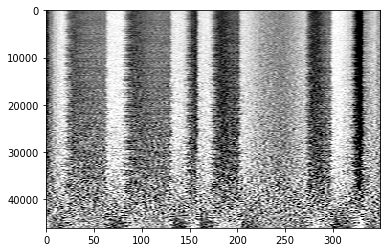

In [4]:
example.get_carpet(tSNR_thresh=15.0, reorder=True)
carpet = example.carpet
plt.imshow(carpet, aspect='auto', cmap='Greys_r', vmin=-2, vmax=2);

In [6]:
example.fit_pca_and_correlate(ncomp=5)
example.PCs.head()

,PC1,PC2,PC3,PC4,PC5
0,0.057596,-0.032718,0.054414,0.109351,0.029696
1,0.075623,-0.034328,0.103845,0.072532,0.033461
2,0.059863,-0.023949,0.100247,0.027904,0.010140
3,0.030722,-0.018144,0.059336,0.026226,-0.024671
4,0.012214,-0.021607,0.027771,0.039732,-0.041447


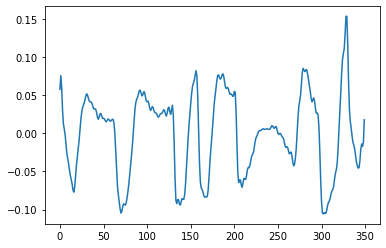

In [8]:
plt.plot(PCs['PC1'])

156


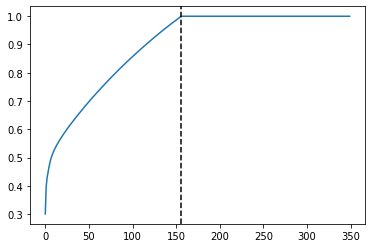

In [12]:
var = example.expl_var
plt.plot(np.cumsum(var), '-')
a = np.argwhere((1 - np.cumsum(var)) < 1e-4).flatten()[0]
print(a)
plt.axvline(a, color='k', linestyle='--')
#plt.hist(pca_fit['scores'][:, 2], bins=20)